<a href="https://colab.research.google.com/github/sabikbshah/datascience1/blob/main/Mall_customer_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


In [ ]:
df0=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df0.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df0.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df0.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df0.groupby('Gender')['Gender'].count()

Gender
Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
df0.columns[1:5]

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

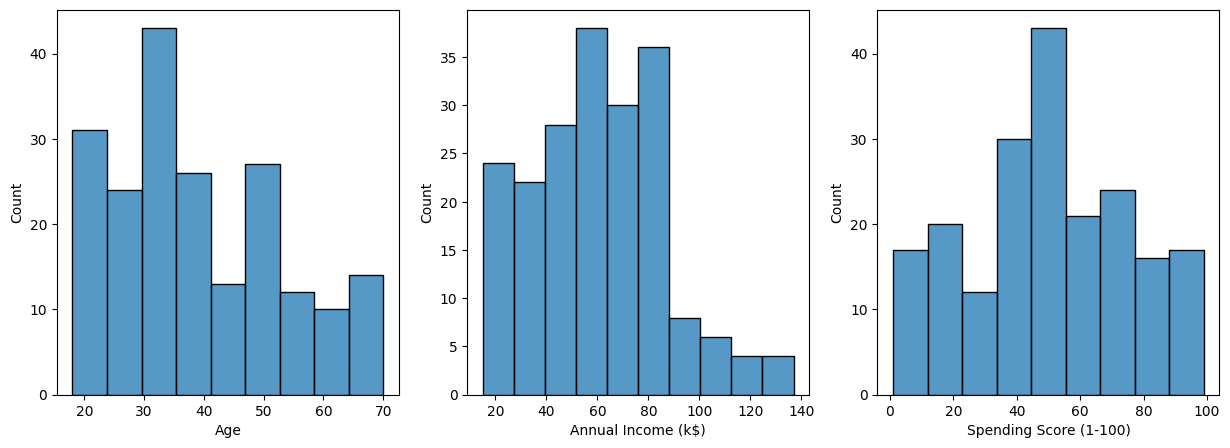

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
c=0
for i in df0.columns[2:5]:
  sns.histplot(df0[i],ax=ax[c])
  c=c+1


In [ ]:
df0.corr()

<ipython-input-10-a6649e8b8fae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df0.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [ ]:
df1=df0.iloc[:,2:5]

In [ ]:
df1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


<Axes: >

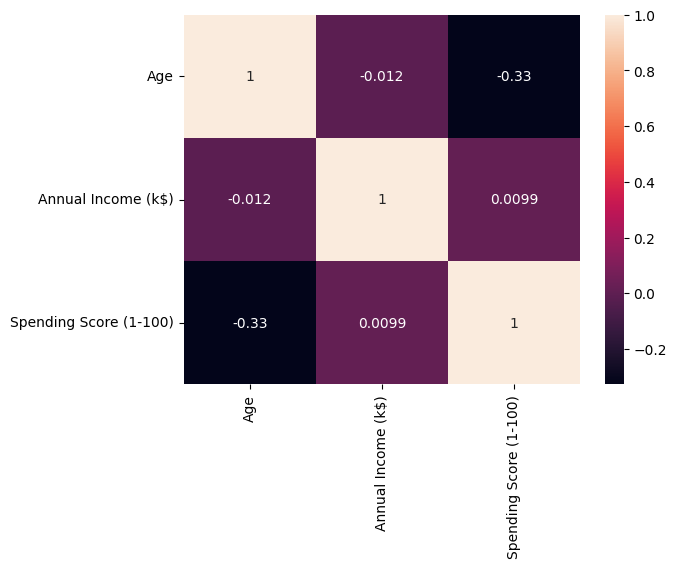

In [ ]:
sns.heatmap(df1.corr(),annot=True)

# Adding categorical columns to categorize different range of values.

In [ ]:
df0['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [ ]:
df0['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [ ]:
df0['Age'].agg(['min','max'])

min    18
max    70
Name: Age, dtype: int64

In [ ]:
pd.cut((17,70),bins=3) # we wont use this cut as our reallife interpretation of age is disregarded

[(16.947, 34.667], (52.333, 70.0]]
Categories (3, interval[float64, right]): [(16.947, 34.667] < (34.667, 52.333] < (52.333, 70.0]]

In [ ]:
#(17-29),(30-50),(50>)
def assign_Age(cols):
  age=cols
  if (age>=17 and age<=29):
    return 'lowerAge'
  elif (age>=30 and age<=50):
    return 'middleAge'
  elif (age>50):
    return 'olderAge'



In [ ]:

df0['Annual Income (k$)'].agg(['min','max'])

min     15
max    137
Name: Annual Income (k$), dtype: int64

In [ ]:
pd.cut((137,15),bins=3)

[(96.333, 137.0], (14.878, 55.667]]
Categories (3, interval[float64, right]): [(14.878, 55.667] < (55.667, 96.333] < (96.333, 137.0]]

In [ ]:
def assign_Income_group(cols):
  inc=cols
  if (inc>=14 and inc<30):
    return 'low income'
  elif (inc>=30 and inc<=60):
    return 'average income'
  elif (inc>60 and inc<90):
    return 'good income'
  elif (inc>=90):
    return 'high income'

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

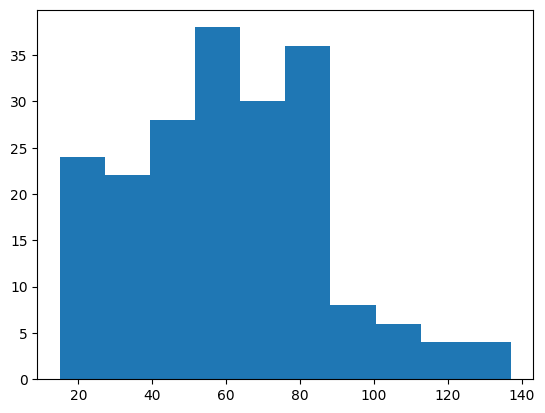

In [ ]:
plt.hist(df1['Annual Income (k$)'])

In [ ]:
df1['Annual Income (k$)'].kurtosis()

-0.09848708652696203

In [ ]:
df1['Spending Score (1-100)'].kurtosis()

-0.8266291062061502

In [ ]:
df1['Spending Score (1-100)'].nunique()

84

In [ ]:
plt.hist(df1['Spending Score (1-100)']))(

SyntaxError: ignored

In [ ]:
import plotly.express as px

px.histogram(df0['Spending Score (1-100)'],nbins=30)

In [ ]:


px.histogram(df0['Annual Income (k$)'],nbins=30)

Spending could be categorized to three parts
* 0-35
*36-67
*68-100

In [ ]:
def assign_score(cols):
  sp=cols
  if (sp>=0 and sp<=35):
    return 'lowScore'
  elif (sp>=36 and sp<=67):
    return 'mediumScore'
  elif (sp>=68 ):
    return 'highScore'

In [ ]:
df0['Age_group']=df0['Age'].apply(assign_Age)
df0['Income_group']=df0['Annual Income (k$)'].apply(assign_Income_group)
df0['assign_score']=df0['Spending Score (1-100)'].apply(assign_score)

In [ ]:
df0.groupby('assign_score')['Annual Income (k$)'].agg(['min','max'])


,min,max
assign_score,,
highScore,15,137
lowScore,16,137
mediumScore,15,99


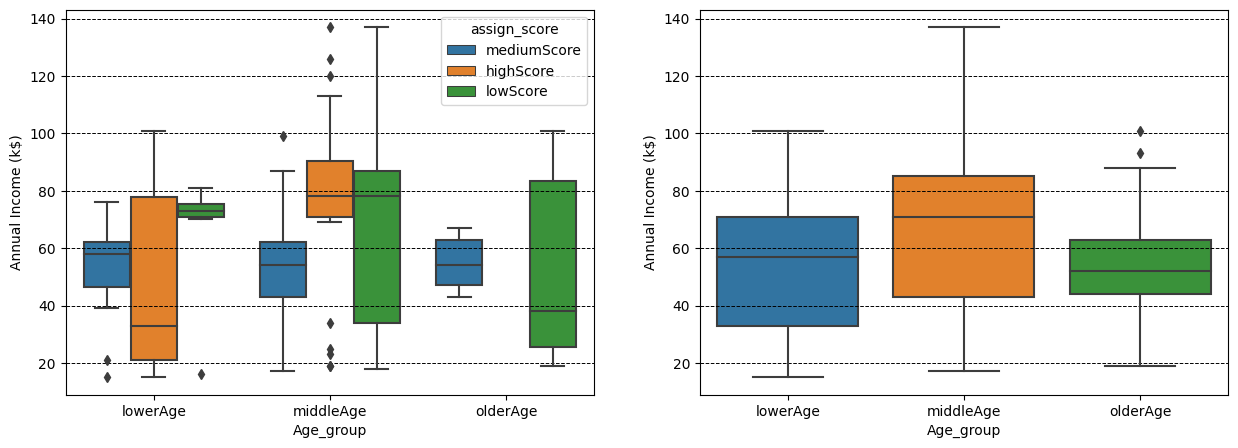

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

sns.boxplot(x='Age_group',y='Annual Income (k$)',data=df0,hue='assign_score',ax=axes[0])
axes[0].yaxis.grid(which="major", color='k', linestyle='--',linewidth=0.7)
sns.boxplot(x='Age_group',y='Annual Income (k$)',data=df0,ax=axes[1])
axes[1].yaxis.grid(which="major", color='k', linestyle='--',linewidth=0.7)



Lets divide more age groups.


In [ ]:
#(17-23),(24-30),(31-49),(49>)
def assign_Age2(cols):
  age=cols
  if (age>=17 and age<=23):
    return 'lowerAge'
  elif (age>=24 and age<=30):
    return 'middleAge'
  elif (age>30 and age<=49):
    return 'higherAge'
  elif (age>49):
    return 'olderAge'

In [ ]:
df0['Age_group2']=df0['Age'].apply(assign_Age2)

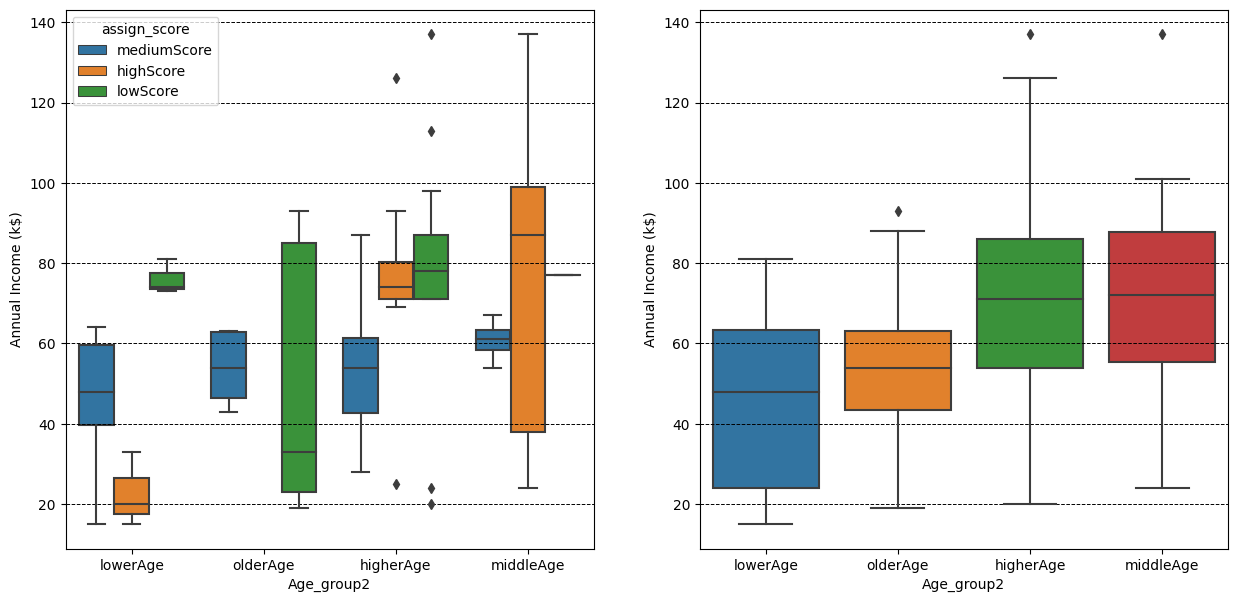

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,7))

sns.boxplot(x='Age_group2',y='Annual Income (k$)',data=df0[df0['Gender']=='Male'],hue='assign_score',ax=axes[0])
axes[0].yaxis.grid(which="major", color='k', linestyle='--',linewidth=0.7)
sns.boxplot(x='Age_group2',y='Annual Income (k$)',data=df0[df0['Gender']=='Male'],ax=axes[1])
axes[1].yaxis.grid(which="major", color='k', linestyle='--',linewidth=0.7)

Text(0.5, 1.0, 'Female')

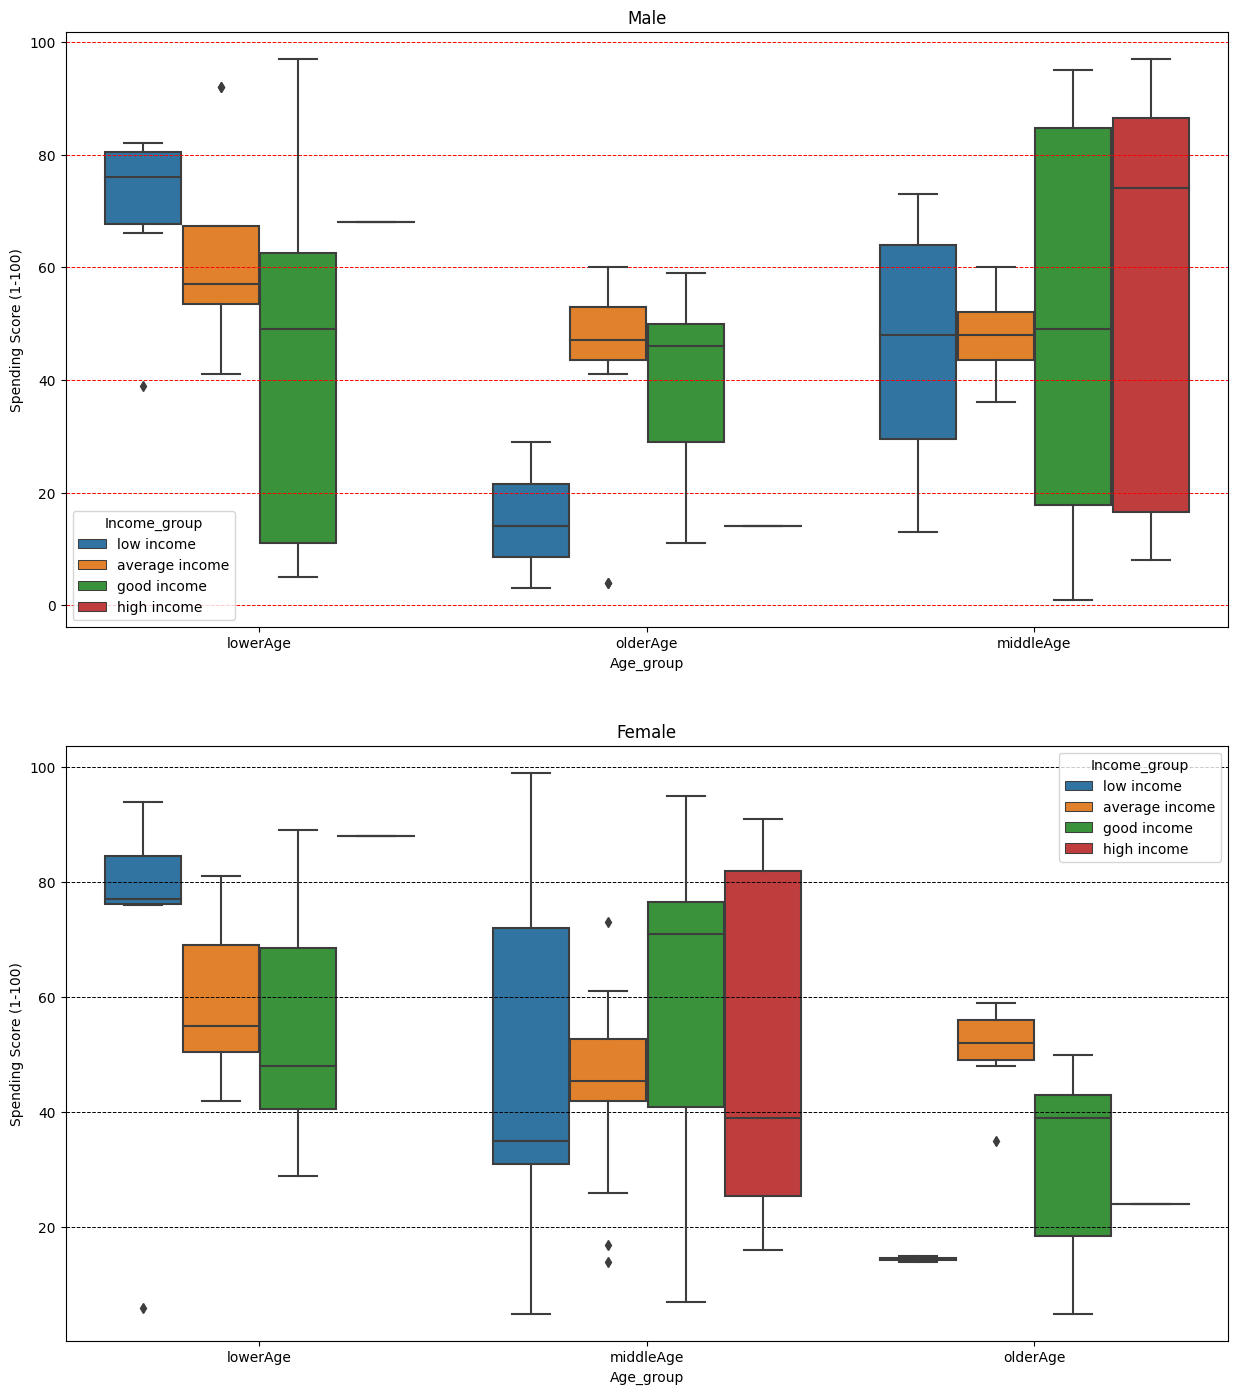

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(15,17))
sns.boxplot(x='Age_group',y='Spending Score (1-100)',data=df0[df0['Gender']=='Male'],hue='Income_group',ax=axes[0])
axes[0].yaxis.grid(which="major", color='r', linestyle='--',linewidth=0.7)
axes[0].set_title('Male')

sns.boxplot(x='Age_group',y='Spending Score (1-100)',data=df0[df0['Gender']=='Female'],hue='Income_group',ax=axes[1])
axes[1].yaxis.grid(which="major", color='k', linestyle='--',linewidth=0.7)
axes[1].set_title('Female')


<Axes: xlabel='Income_group', ylabel='Spending Score (1-100)'>

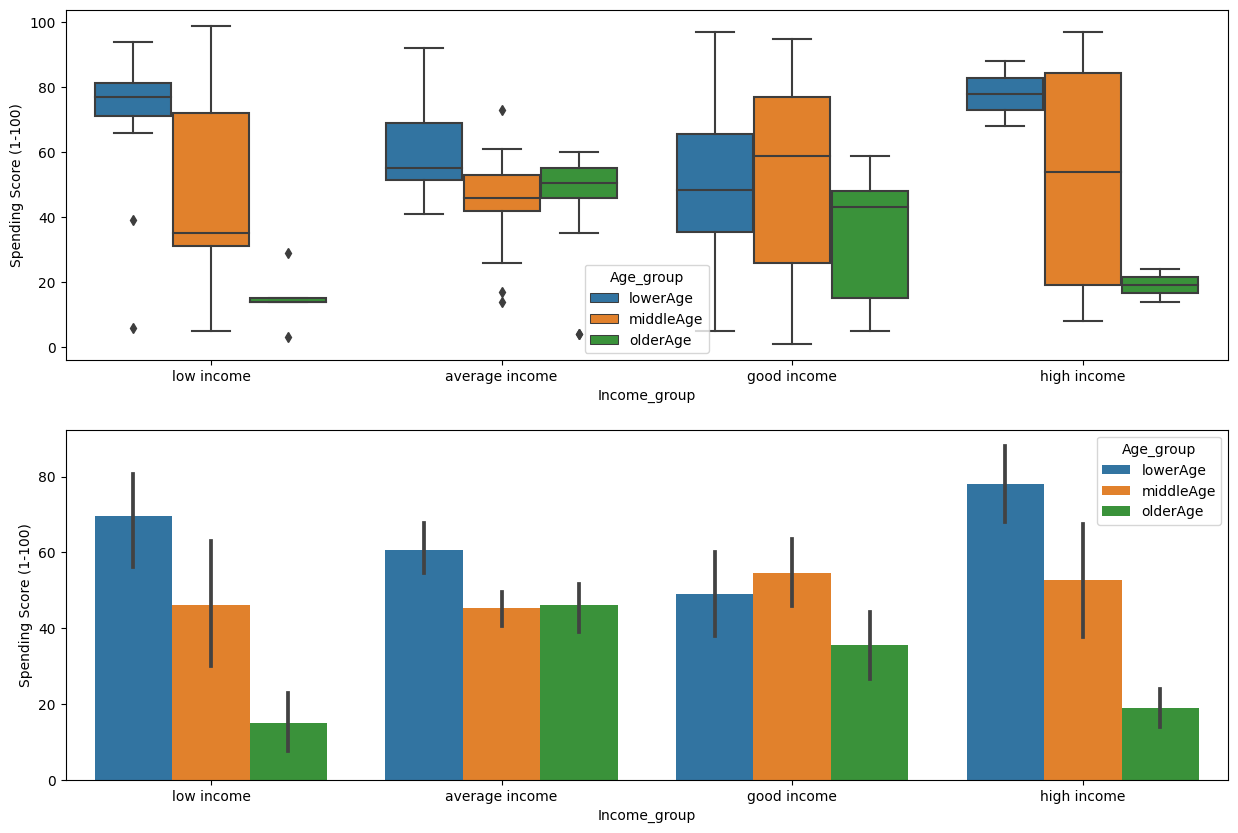

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x='Income_group',y='Spending Score (1-100)',data=df0,hue='Age_group',ax=axes[0])
sns.barplot(x='Income_group',y='Spending Score (1-100)',data=df0,hue='Age_group',ax=axes[1])


<Axes: xlabel='Income_group', ylabel='Spending Score (1-100)'>

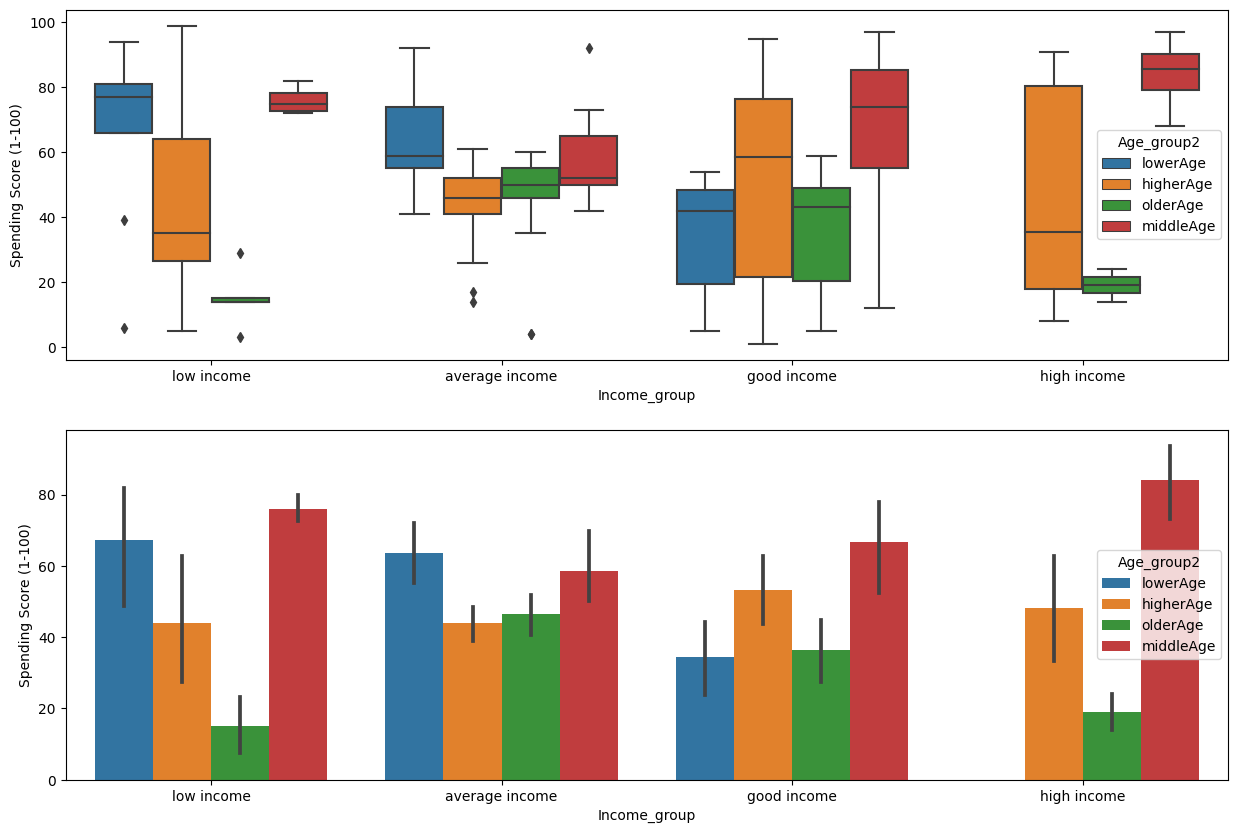

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x='Income_group',y='Spending Score (1-100)',data=df0,hue='Age_group2',ax=axes[0])
sns.barplot(x='Income_group',y='Spending Score (1-100)',data=df0,hue='Age_group2',ax=axes[1])

<Axes: xlabel='Age_group'>

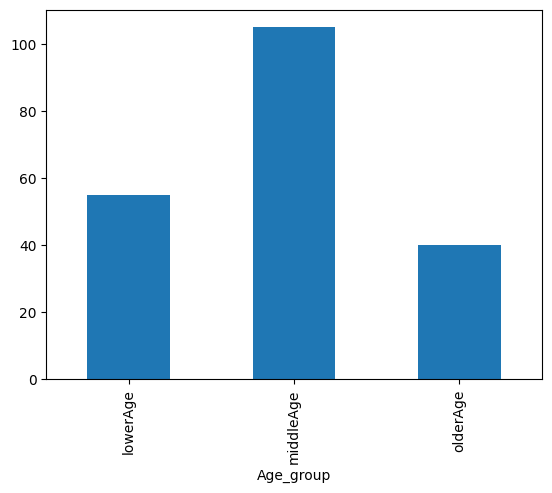

In [ ]:
df0.groupby('Age_group')['Age'].count().plot(kind='bar')

In [ ]:
pd.crosstab(df0['Age_group'],df0['Gender'])

Gender,Female,Male
Age_group,,
lowerAge,29,26
middleAge,65,40
olderAge,18,22


<Axes: xlabel='Age_group'>

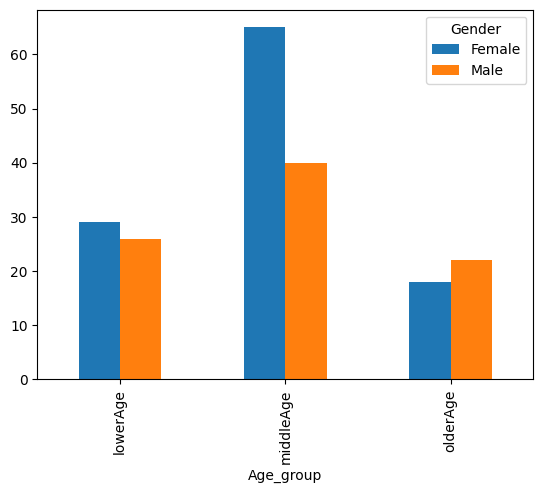

In [ ]:
pd.crosstab(df0['Age_group'],df0['Gender']).plot(kind='bar')

* Now we can compare different ages if there are smae number while there is hi

* older age spent less
* as older spend less but spent increased with income directly went up upto (40-60)
* this says low income is insufficient for basic satisfaction so 40-50 is threshold of basic requirement.

# K means for only two features

In [ ]:
# Spending and Annual Income

X=df0[['Annual Income (k$)','Spending Score (1-100)']]


In [ ]:
wcss=[]
for k in range(1,13):
  model1=KMeans(n_clusters=k)
  model1.fit(X)
  wcss.append(model1.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

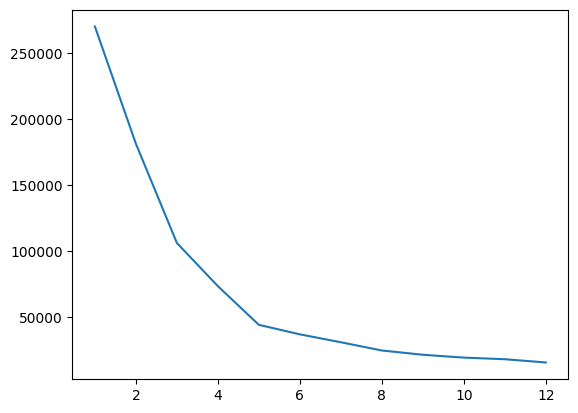

In [ ]:
plt.plot(np.arange(1,13),wcss)

 We have 5 as elbow point for [ Spending and Annual Income ]

In [ ]:
X.head(1)

,Annual Income (k$),Spending Score (1-100)
0,15,39


In [ ]:
model1=KMeans(n_clusters=5)
y1=model1.fit_predict(X)
X['y1']=y1



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-47-b325bd4d7f50>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
y1

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

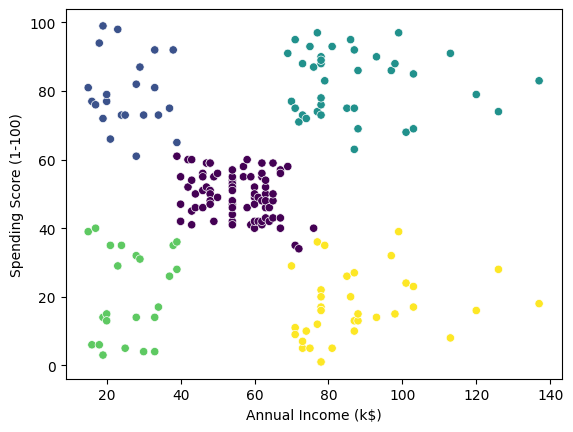

In [ ]:
sns.scatterplot(
            x=X['Annual Income (k$)'],
            y=X['Spending Score (1-100)'],
            c=X['y1']
            )
plt.show()

In [ ]:
X.head(1)

,Annual Income (k$),Spending Score (1-100),y1
0,15,39,3


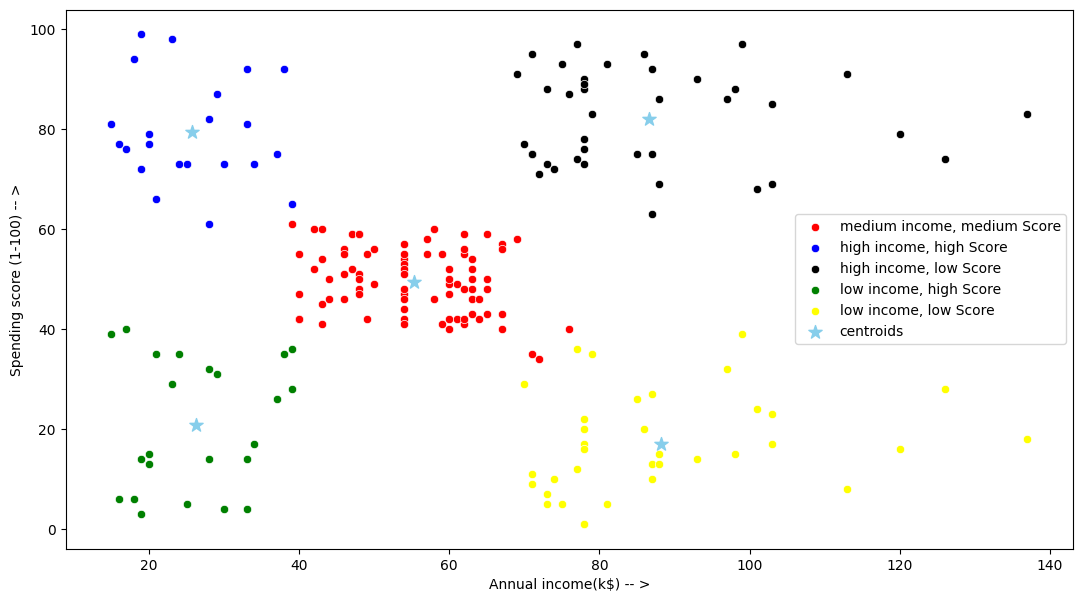

In [ ]:
plt.figure(figsize = (13,7))
sns.scatterplot(
            x=X[X['y1']==0]['Annual Income (k$)'],
            y=X[X['y1']==0]['Spending Score (1-100)'],
            c='red',label='medium income, medium Score')
sns.scatterplot(
            x=X[X['y1']==1]['Annual Income (k$)'],
            y=X[X['y1']==1]['Spending Score (1-100)'],
            c='blue',label='high income, high Score'
)
sns.scatterplot(
            x=X[X['y1']==2]['Annual Income (k$)'],
            y=X[X['y1']==2]['Spending Score (1-100)'],
            c='black',label='high income, low Score'
)
sns.scatterplot(
            x=X[X['y1']==3]['Annual Income (k$)'],
            y=X[X['y1']==3]['Spending Score (1-100)'],
            c='green',label='low income, high Score'
)
sns.scatterplot(
            x=X[X['y1']==4]['Annual Income (k$)'],
            y=X[X['y1']==4]['Spending Score (1-100)'],
            c='yellow',label='low income, low Score'
)
plt.scatter(model1.cluster_centers_[:,0],model1.cluster_centers_[:,1], s = 100, c = "skyblue", label = "centroids",marker='*')
plt.xlabel("Annual income(k$) -- >")
plt.ylabel("Spending score (1-100) -- >")
plt.legend()
plt.show()

In [ ]:
model1.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [ ]:
model1.cluster_centers_[:,1]

array([49.51851852, 79.36363636, 82.12820513, 20.91304348, 17.11428571])

In [ ]:
centeroids=model1.cluster_centers_
centeroids

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

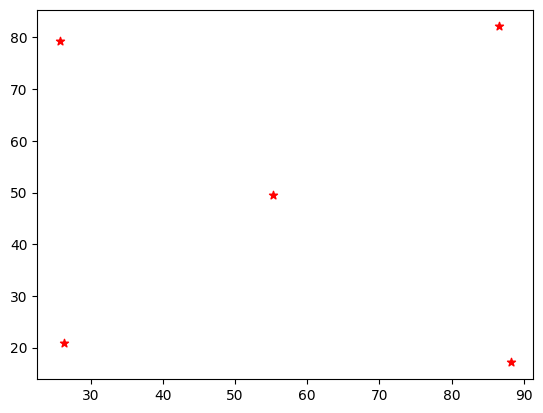

In [ ]:


plt.scatter(x=centeroids[:,0],y=centeroids[:,1],marker="*",color='r')

In [ ]:
wcss=[]
for k in range(1,17):
  model=KMeans(n_clusters=k)
  model.fit(df1)
  sse=model.inertia_
  wcss.append(sse)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

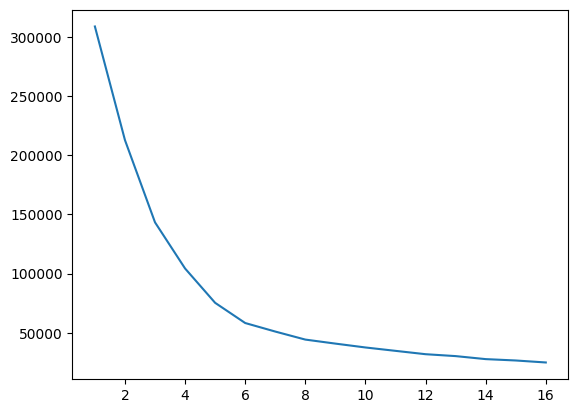

In [ ]:
plt.plot(range(1,17),wcss)

In [ ]:
model=KMeans(n_clusters=6,random_state=0)
y=model.fit_predict(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [ ]:
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
df1[y==0]['Age']

43     31
47     27
48     29
49     31
51     33
52     31
58     27
61     19
65     18
68     19
69     32
75     26
77     40
78     23
81     38
84     21
87     22
88     34
91     18
93     40
94     32
95     24
97     27
99     20
100    23
103    26
105    21
111    19
112    38
113    19
114    18
115    19
120    27
121    38
122    40
124    23
132    25
142    28
Name: Age, dtype: int64

In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = 'Spending Score--->'),zaxis = dict(title  = 'Annual Income-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=df1['Age'], y=df1['Spending Score (1-100)'], z=df1['Annual Income (k$)'], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
df1.head(1)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39


# Silhouette score that finds best cluster than elbow method but require more computational power

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
Silhouette=[]
count=2
for k in range(2,13):
  model3=KMeans(n_clusters=k)
  model3.fit_predict(df1)
  labels=model3.labels_
  Silhouette.append( silhouette_score(df1,labels) )
  count=count+1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
count

13

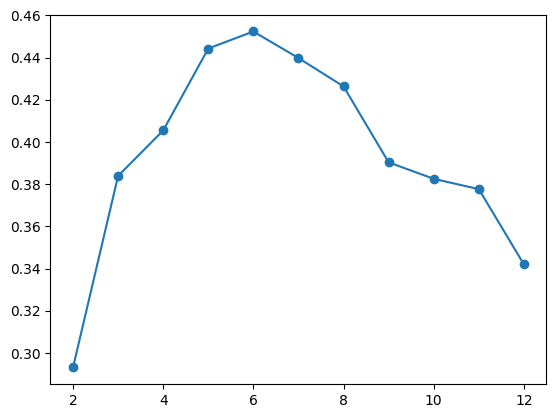

In [ ]:
plt.plot(np.arange(2,13),Silhouette,marker='o',label=True)